##### MST IASD 2023-2024 (FST De Tanger - Département Génie Informatique)
##### Subject: Probabilistic Method (EM-algorithm)
##### Group Members : Chibani Fahd, Samady Ahmed, and Fakhre-Eddine Mohamed Amine
##### Dataset: Iris , Mall-Customers
##### Model : EM-algorithm

### What is the Expectation-Maximization algorithm

The Expectation-Maximization (EM) algorithm is a powerful statistical technique widely employed in various fields, including machine learning, statistics, and data analysis. Developed as a general framework for estimating parameters in probabilistic models, EM is particularly adept at handling situations involving incomplete or missing data.

### Uses of EM Algorithm

These are just a few examples, and the EM algorithm has broad applicability across different domains:

 - Used in part-of-speech tagging to identify and label parts of speech in a given text.
 - Used as the basis of the unsupervised learning of clusters.
 - Used in bioinformatics for tasks such as protein structure prediction and gene expression analysis.
 - Applied in pattern recognition tasks, such as handwriting recognition and face recognition.
 - Used in the field of image processing for tasks such as image segmentation and object recognition.

### Steps of EM Algorithm

- Step 1: Given a set of incomplete data, consider a set of starting parameters (Initialization).
- Step 2 - Expectation (E-step): In the E-step, initial estimates are made and probabilities are assigned to each observation based on these estimates.
- Step 3 - Maximization (M-step): In the M-step, the assigned probabilities from the E-step are used to update the estimates, refining them based on the assigned weights.
- Step 4 - Iteration: The E-step and M-step are repeated iteratively, with each iteration improving the estimates based on the updated probabilities.
- Step 5 - Convergence: The iterative process continues until convergence, where the estimates reach a stable state and the algorithm stops updating.
<br>
<br>
<center>
    <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F8226007%2F4dc665c51e1f5000a6e68cf5f7ff766a%2FEM%20Algo_New.png?generation=1689604291527384&alt=media" alt="EM algo steps">
</center>


### Imports

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## I- EM-Algorithm

### Means, Covariances and weights initilization

In [2]:
# Function to initialize parameters for EM algorithm
def initialize_parameters(num_clusters, num_features):
    means = np.random.rand(num_clusters, num_features)
    covariances = np.array([np.identity(num_features) for _ in range(num_clusters)])
    weights = np.ones(num_clusters) / num_clusters
    return means, covariances, weights

### E-Step

In [3]:
# Function to perform the E-step
def E_step(x_data, means, covariances, weights):
    num_clusters = len(means)
    num_samples = len(x_data)

    e_matrix = np.zeros((num_samples, num_clusters))

    for i in range(num_clusters):
        # Multivariate Gaussian PDF
        pdf_values = weights[i] * multivariate_normal.pdf(x_data, mean=means[i], cov=covariances[i])
        e_matrix[:, i] = pdf_values

    # Normalize
    e_matrix /= e_matrix.sum(axis=1, keepdims=True)

    return e_matrix

### M-Step

In [4]:
# Function to perform the M-step
def M_step(x_data, e_matrix):
    num_clusters = e_matrix.shape[1]
    num_samples, num_features = x_data.shape

    # Update means
    means = np.dot(e_matrix.T, x_data) / e_matrix.sum(axis=0)[:, np.newaxis]

    # Update covariances
    covariances = np.zeros((num_clusters, num_features, num_features))
    for i in range(num_clusters):
        diff = x_data - means[i]
        covariances[i] = np.dot(e_matrix[:, i] * diff.T, diff) / e_matrix[:, i].sum()

    # Update weights
    weights = e_matrix.sum(axis=0) / num_samples

    return means, covariances, weights

### Full EM Algorithm

In [5]:
# EM algorithm for clustering
def EM_algorithm(x_data, num_clusters, max_iterations=100, tolerance=1e-4):
    num_features = x_data.shape[1]
    means, covariances, weights = initialize_parameters(num_clusters, num_features)

    means_prev = means.copy()  # Initialize means_prev here

    for iteration in range(max_iterations):
        # E-step
        e_matrix = E_step(x_data, means, covariances, weights)
        
        # M-step
        means, covariances, weights = M_step(x_data, e_matrix)

        # Check convergence
        if np.linalg.norm(means - means_prev) < tolerance:
            break

        means_prev = means.copy()

    return means, covariances, weights, e_matrix

### Loading Dataset and Standard Scaling

In [6]:
# Load Iris dataset
iris = load_iris()
x_data = iris.data

# Standardize the data
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

### Fitting the model

In [7]:
# Run EM algorithm
means, covariances, weights, e_matrix = EM_algorithm(x_data, 3)

### Actual iris dataset Clusters plot with centroids: petalLength vs petalWidth

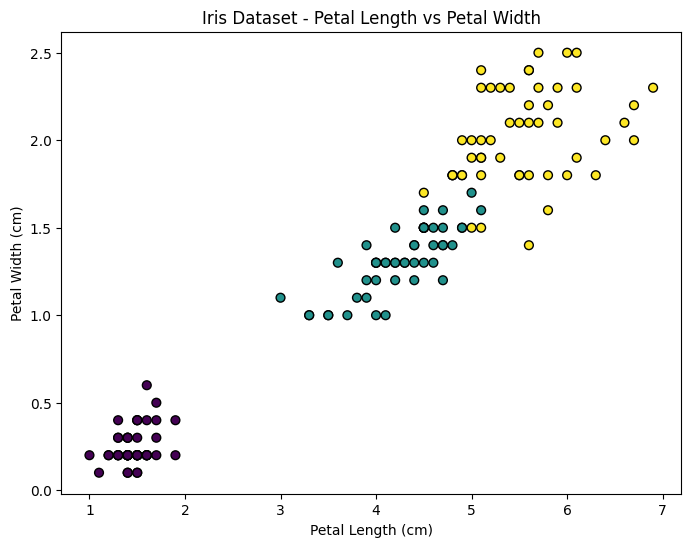

In [8]:
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_data['target'] = iris_data['target'].astype(int)
# Visualize the classes using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(iris_data['petal length (cm)'], iris_data['petal width (cm)'], c=iris_data['target'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()

### Actual iris dataset Clusters plot with centroids: sepalLength vs sepalWidth

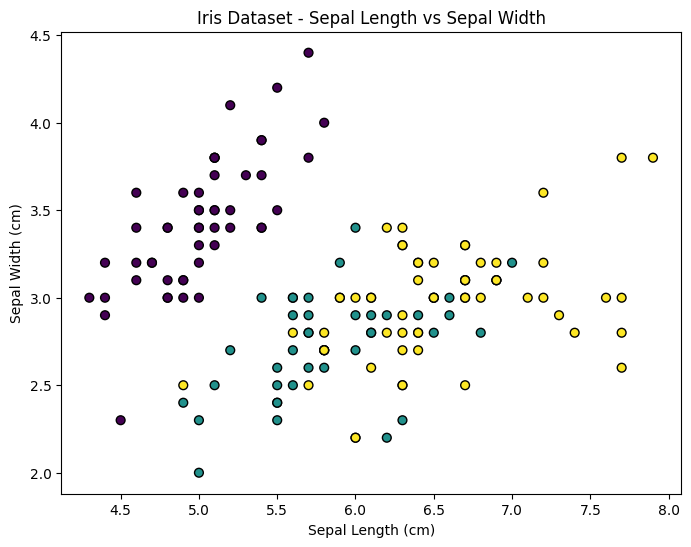

In [9]:
# Visualize the classes using Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_data['target'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.show()

### Predicted iris dataset Clusters plot with centroids using the EM-algorithm: petalLength vs petalWidth

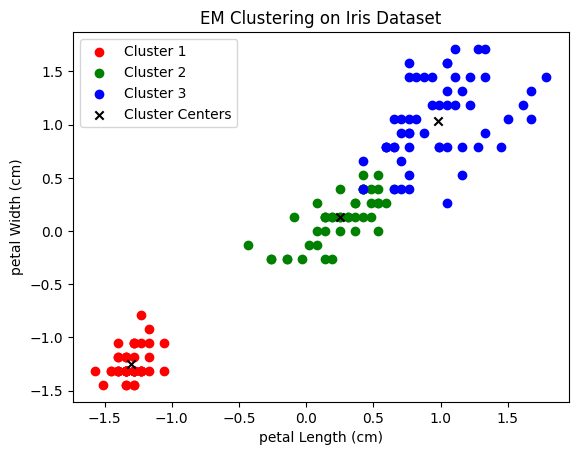

In [10]:
# Plot the results
colors = ['red', 'green', 'blue']
labels = np.argmax(e_matrix, axis=1)

for i in range(3):
    plt.scatter(x_data[labels == i, 2], x_data[labels == i, 3], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(means[:, 2], means[:, 3], c='black', marker='x', label='Cluster Centers')
plt.xlabel('petal Length (cm)')
plt.ylabel('petal Width (cm)')
plt.legend()
plt.title('EM Clustering on Iris Dataset')
plt.show()

### Predicted iris dataset Clusters plot with centroids using the EM-algorithm: sepalLength vs sepalWidth

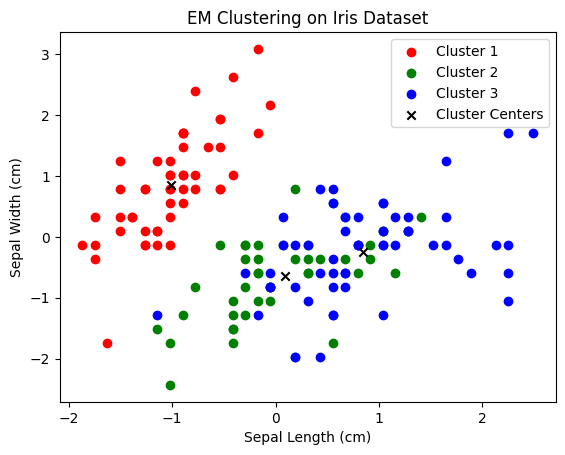

In [11]:
for i in range(3):
    plt.scatter(x_data[labels == i, 0], x_data[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(means[:, 0], means[:, 1], c='black', marker='x', label='Cluster Centers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('EM Clustering on Iris Dataset')
plt.show()

## II- K-means

### II-1 Iris dataset

In [12]:
kmeans = KMeans(n_clusters=3,max_iter=1000,tol=1e-4)
kmeans.fit(iris.data)

KMeans(max_iter=1000, n_clusters=3)

### Predicted iris dataset Clusters plot with centroids using K-means: petalLength vs petalWidth

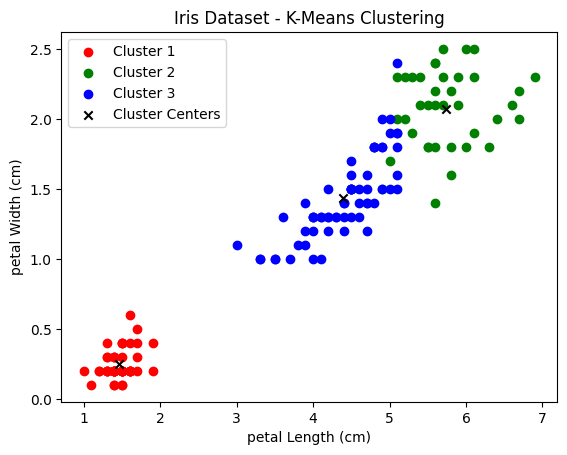

In [13]:
colors = ['red', 'green', 'blue']
labels = kmeans.labels_

for i in range(3):
    plt.scatter(iris.data[labels == i, 2], iris.data[labels == i, 3], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='black', marker='x', label='Cluster Centers')
plt.xlabel('petal Length (cm)')
plt.ylabel('petal Width (cm)')
plt.legend()
plt.title('Iris Dataset - K-Means Clustering')
plt.show()

### II-2 Mall Customers Dataset

In [14]:
df = pd.read_csv('..\R-implementation\data\Mall_Customers_Clean.csv')
df = df.iloc[:, 1:]
mall_data = df.values
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
kmeans_mall = KMeans(n_clusters=5,max_iter=1000,tol=1e-4)
kmeans_mall.fit(mall_data)

KMeans(max_iter=1000, n_clusters=5)

### Predicted mall customers dataset Clusters plot with centroids using K-means.

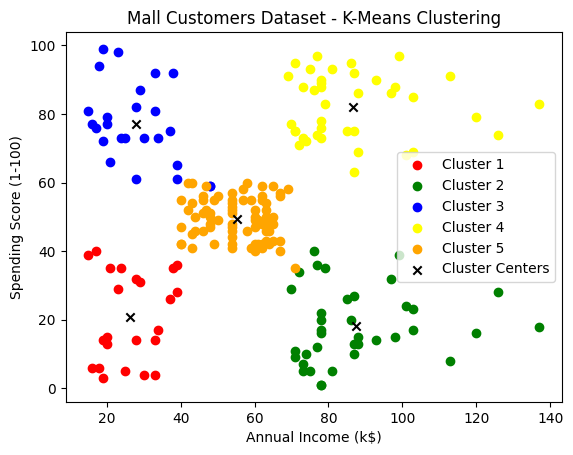

In [16]:
colors = ['red', 'green', 'blue','yellow','orange']
labels = kmeans_mall.labels_

for i in range(5):
    plt.scatter(mall_data[labels == i, 1], mall_data[labels == i, 2], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(kmeans_mall.cluster_centers_[:, 1], kmeans_mall.cluster_centers_[:, 2], c='black', marker='x', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Mall Customers Dataset - K-Means Clustering')
plt.show()